In [359]:
#Importando as bibliotecas

import numpy as np # biblioteca numpy para
import pandas as pd 
# fazer cálculos matemáticos
from sklearn.model_selection  import train_test_split # importa da biblioteca sklearn.model  a biblioteca train test split
# essa biblioteca train test split serve para  dividir os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # vai importar o
#algoritmo  da arvore de decisão
from sklearn import tree # importa a biblioteca para plotar a arvore de decisão
import matplotlib.pyplot as plt # importa a biblioteca matplotlib
import seaborn as sns # importa a biblioteca seaborn
from sklearn.metrics import accuracy_score # métrica de acurácia do algoritmo
from sklearn.metrics import precision_score # métrica de precisao do algoritmo
from sklearn.metrics import recall_score # métrica de recall do algoritmo
from sklearn.metrics import f1_score # métrica de f1 score
from sklearn.metrics import confusion_matrix # importa a matriz de confusão

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler #biblioteca para normalizar os dados
from matplotlib.colors import ListedColormap

In [360]:
pip install scikit-learn 


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [361]:
#Importando os dados

df = pd.read_csv(r'C:\Users\dsadm\Desktop\Disciplina_IA_Big_Data\Formativa\dados_produtos.csv')

In [362]:
#Leitura do cabeçalho

df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [363]:
#Informações do conjunto de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [364]:
#Descrição do conjunto de dados

df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [365]:
# Pegando todas as notas e os nomes dos produtos
notas = df['rating']
product_name = df['product_name']
total_notas = df['rating_count']

C:\Users\dsadm\AppData\Local\Temp\ipykernel_21864\675799683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=product_name, y=notas, palette='Set2') # 'Set2' paleta de cores predefinida


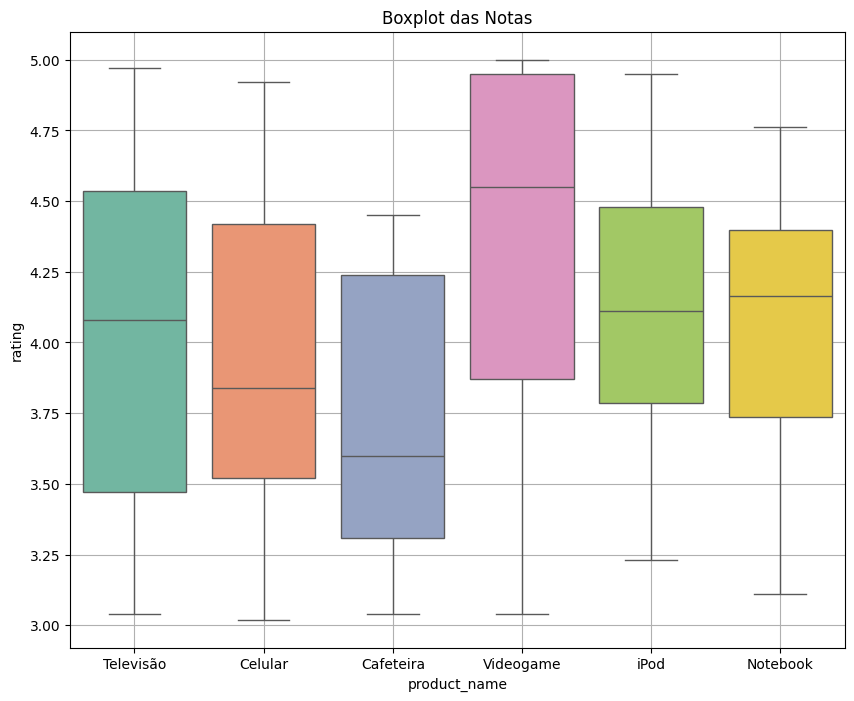

In [366]:
# Fazendo o box plot das notas
# x é o eixo x que indica os nomes dos produtos
# y indica as notas

plt.figure(figsize=(10,8))

plt.title('Boxplot das Notas')

sns.boxplot(x=product_name, y=notas, palette='Set2') # 'Set2' paleta de cores predefinida

plt.grid()

# Mostrar o gráfico
plt.show()


In [367]:
# Importando a biblioteca necessária
from sklearn.model_selection import train_test_split

# Definindo X e y
X = np.array(df['rating'])  
y = np.array(df['product_name'])

# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size=0.2, random_state=42)

# Verificando as dimensões dos conjuntos de dados
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treinamento: (80, 1)
Tamanho do conjunto de teste: (20, 1)


In [368]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score

In [369]:
modelo = DecisionTreeClassifier() # crio meu modelo de árvore de decisão

In [370]:
modelo.fit(X_train, y_train) # Treinamento do modelo de árvore de decisão

DecisionTreeClassifier()

In [371]:
previsoes = modelo.predict(X_test)  # dentro de modelo predict  é colocado as notas
previsoes

array(['Notebook', 'Televisão', 'Celular', 'Videogame', 'Videogame',
       'Cafeteira', 'Televisão', 'Notebook', 'Celular', 'Cafeteira',
       'Notebook', 'Cafeteira', 'Cafeteira', 'iPod', 'Celular',
       'Videogame', 'Celular', 'Celular', 'Celular', 'iPod'], dtype=object)

In [372]:
X_test

array([[4.36],
       [4.24],
       [4.01],
       [4.98],
       [3.45],
       [4.31],
       [4.49],
       [3.38],
       [4.43],
       [3.04],
       [4.18],
       [3.02],
       [3.04],
       [4.45],
       [3.99],
       [5.  ],
       [3.87],
       [3.69],
       [4.42],
       [4.12]])

In [373]:
# teste de nota
nota = np.array([4,7]).reshape(-1,1) 
resultado = modelo.predict(nota)
resultado

array(['Celular', 'Videogame'], dtype=object)

0.25 [[0 0 0 1 0 1]
 [2 2 2 0 0 0]
 [0 1 1 0 0 0]
 [1 1 0 0 1 1]
 [1 2 0 0 2 0]
 [0 0 0 1 0 0]]


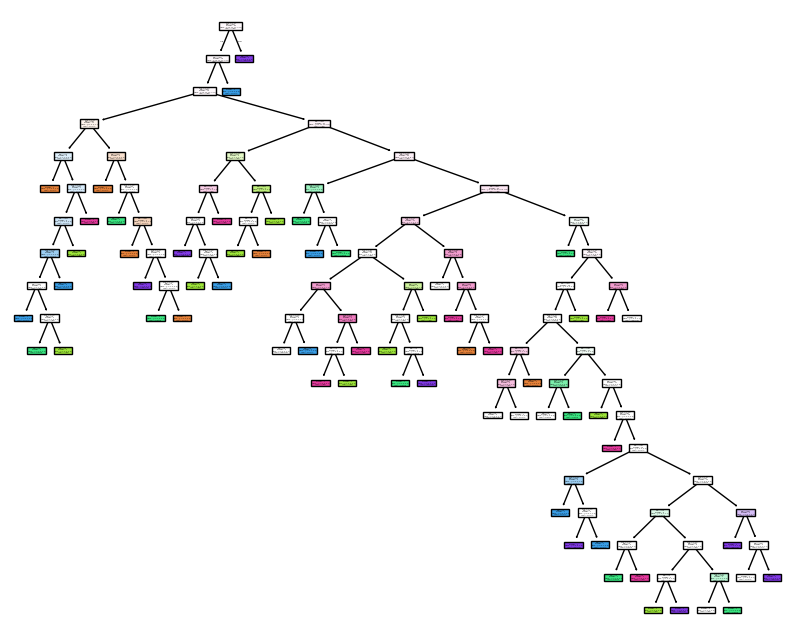

In [374]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

acurracy = accuracy_score(y_test, previsoes)
matrix = confusion_matrix(y_test, previsoes)
print(acurracy, matrix)
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model, feature_names=df['rating'].tolist(), class_names=df['product_name'].tolist(), filled=True)
plt.show()


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 0]
 [1 0]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Co

C:\Users\dsadm\AppData\Local\Temp\ipykernel_21864\188715091.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_21864\188715091.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Pr

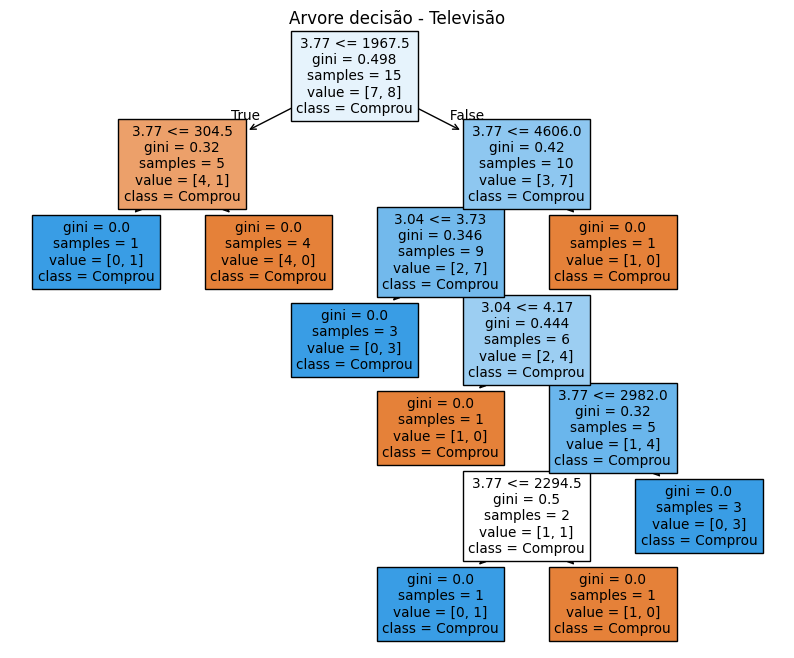

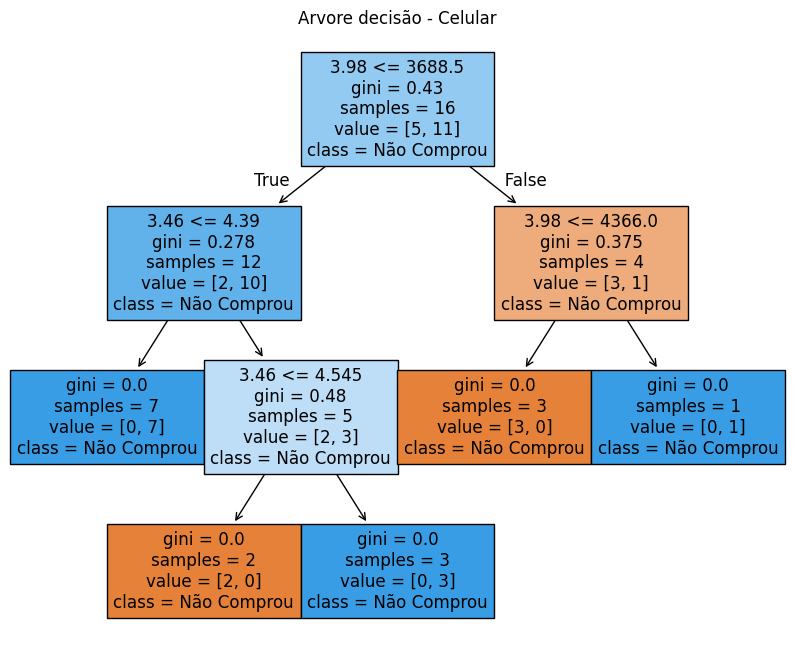

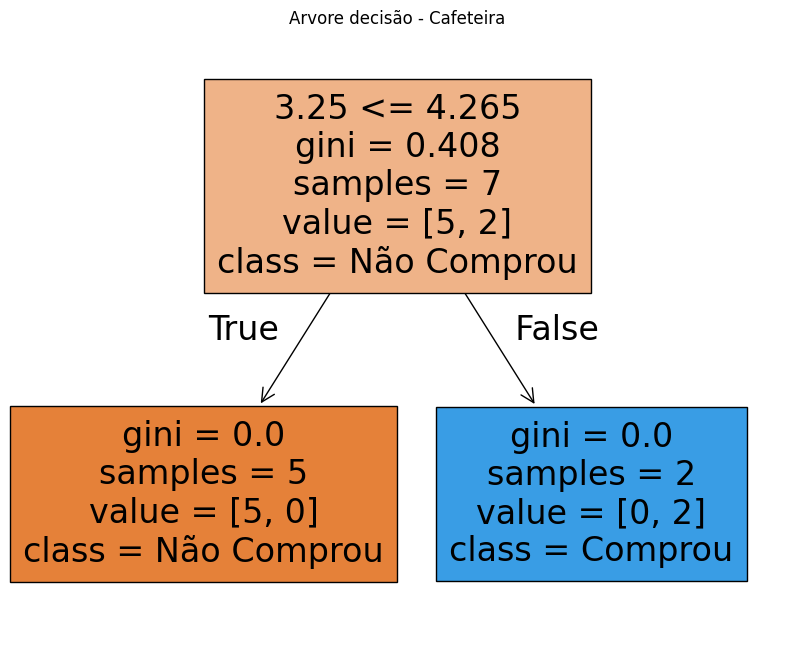

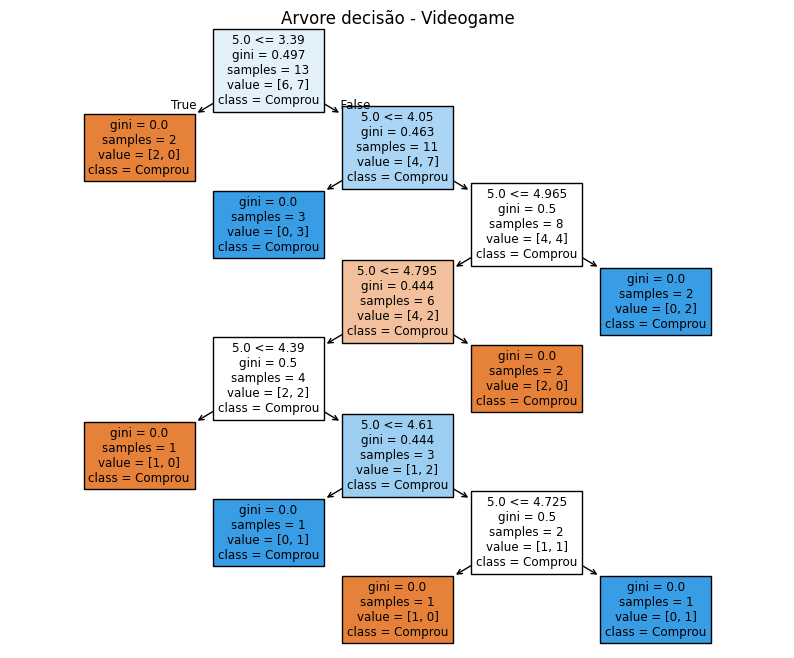

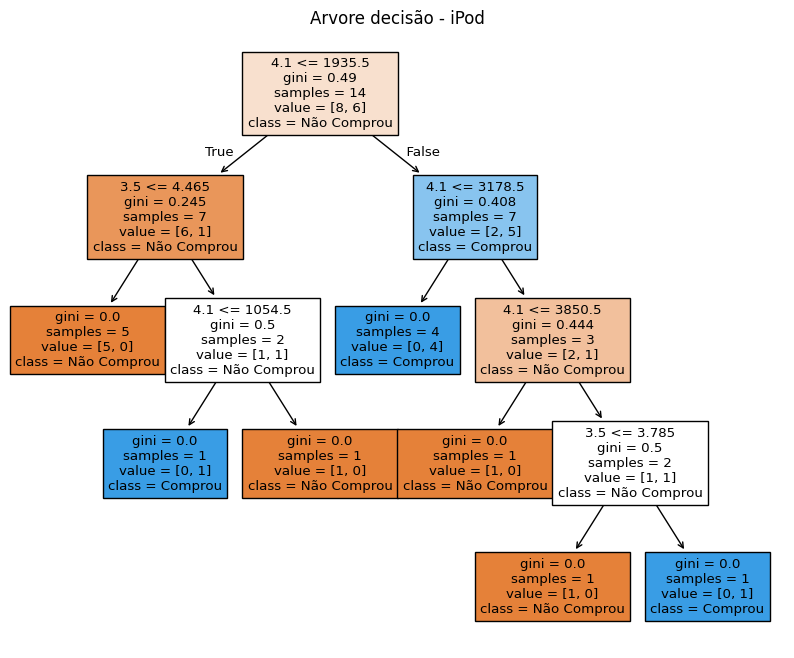

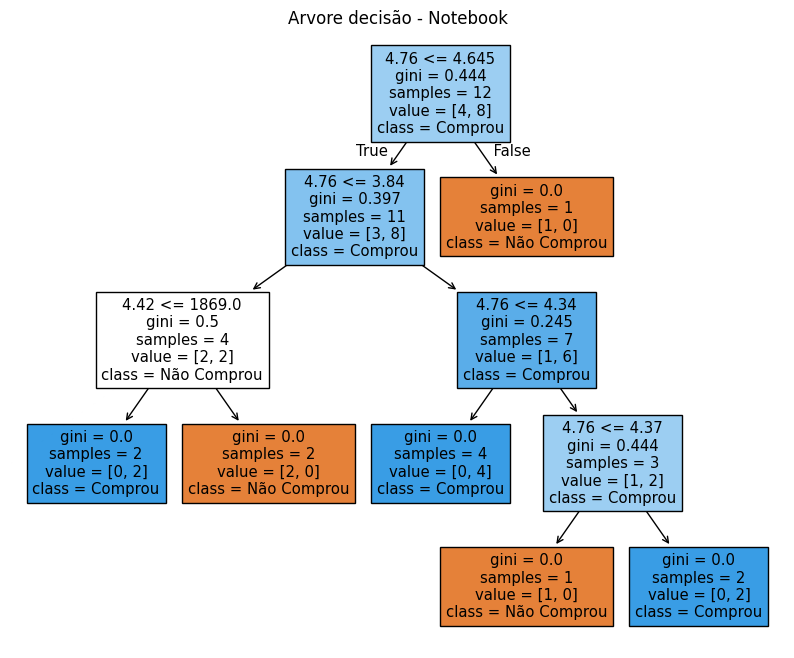

In [375]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')